## Data Understanding: Notebook clearly describes the source and properties of the data to show how useful the data are for solving the problem of interest.¶
-Describe the data sources and explain why the data are suitable for the project  
-Present the size of the dataset and descriptive statistics for all features used in the analysis  
-Justify the inclusion of features based on their properties and relevance for the project  
-Identify any limitations of the data that have implications for the project  

## Data Preparation: Notebook shows how you prepare your data and explains why by including…  
- Instructions or code needed to get and prepare the raw data for analysis  
- Code comments and text to explain what your data preparation code does  
- Valid justifications for why the steps you took are appropriate for the problem you are solving  


# Zillow Home Value Index Data

## Obtaining the Data 

In [1]:
#import libraries & modules 
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None)

### Zillow Data

Data from Zillow's Home Value Index (ZHVI) is being used. Zillow Home Value Index is a measure of a homes typical value and market changes across a given region and type of housing. By measuring monthly changes in property accross different housing types and geographies Zillow is able to capture how the market price changes and not just the changes in the kinds of markets or property types that sell on a month to month basis. The ZHVI dollar amount is representative of the "typical home value for a region" and not the "median home value". 

We will be looking at three different datasets from Zillow that have been smoothed and seasonally adjusted:
- **Bottom Tier Homes**: typical value for homes within the 5th to 35th percentile range for a given region.  
- **Middle Tier Homes**: typical value for homes within the 35th to 65th percentile range for a given region.  
- **Top Tier Homes**: typical value for homes within the 65th to 95th percentile range for a given region.  

| **Column Name** | Description |
| --- | --- |
|**SizeRank** | Numerical rank of size of cities, ranked 0 through 30,132
|**RegionName** | Name of the city
|**State** | State in which the city is located
|**1/31/2000 through 4/30/2023** |refers to the typical home value for the city for January 2000 through April 2023. 
| **b** | home value six months before the hurricane |
| **a** | home value six months after the hurricane |
| **percent** | percent change in home value from six months before hurricane to six months after hurricane |
| **bool** | 1 = increase of 75% of more in home value, 0 = no increase of 75% of more in home value |


### Citations
Olsen S. Zillow Home Value Index Methodology, 2023 Revision: What’s Changed? Zillow. Published February 11, 2023. https://www.zillow.com/research/methodology-neural-zhvi-32128/    
ZHVI User Guide. Zillow Research. https://www.zillow.com/research/zhvi-user-guide/    
Zillow. Housing Data - Zillow Research. Zillow Research. Published 2011. https://www.zillow.com/research/data/   

## Obtaining the Data

In [2]:
#opening the datasets 
#b for bottom tier
bottom = pd.read_csv(r'data\Zillow Bottom Tier.csv')
#t for top tier 
top = pd.read_csv(r'data\Zillow Top Tier.csv')
#m for middle tier 
middle = pd.read_csv(r'data\housing.csv')

In [3]:
#taking a look
bottom.head()

,SizeRank,RegionName,State,1/31/2000,2/29/2000,3/31/2000,4/30/2000,5/31/2000,6/30/2000,7/31/2000,8/31/2000,9/30/2000,10/31/2000,11/30/2000,12/31/2000,1/31/2001,2/28/2001,3/31/2001,4/30/2001,5/31/2001,6/30/2001,7/31/2001,8/31/2001,9/30/2001,10/31/2001,11/30/2001,12/31/2001,1/31/2002,2/28/2002,3/31/2002,4/30/2002,5/31/2002,6/30/2002,7/31/2002,8/31/2002,9/30/2002,10/31/2002,11/30/2002,12/31/2002,1/31/2003,2/28/2003,3/31/2003,4/30/2003,5/31/2003,6/30/2003,7/31/2003,8/31/2003,9/30/2003,10/31/2003,11/30/2003,12/31/2003,1/31/2004,2/29/2004,3/31/2004,4/30/2004,5/31/2004,6/30/2004,7/31/2004,8/31/2004,9/30/2004,10/31/2004,11/30/2004,12/31/2004,1/31/2005,2/28/2005,3/31/2005,4/30/2005,5/31/2005,6/30/2005,7/31/2005,8/31/2005,9/30/2005,10/31/2005,11/30/2005,12/31/2005,1/31/2006,2/28/2006,3/31/2006,4/30/2006,5/31/2006,6/30/2006,7/31/2006,8/31/2006,9/30/2006,10/31/2006,11/30/2006,12/31/2006,1/31/2007,2/28/2007,3/31/2007,4/30/2007,5/31/2007,6/30/2007,7/31/2007,8/31/2007,9/30/2007,10/31/2007,11/30/2007,12/31/2007,1/31/2008,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,7/31/2008,8/31/2008,9/30/2008,10/31/2008,11/30/2008,12/31/2008,1/31/2009,2/28/2009,3/31/2009,4/30/2009,5/31/2009,6/30/2009,7/31/2009,8/31/2009,9/30/2009,10/31/2009,11/30/2009,12/31/2009,1/31/2010,2/28/2010,3/31/2010,4/30/2010,5/31/2010,6/30/2010,7/31/2010,8/31/2010,9/30/2010,10/31/2010,11/30/2010,12/31/2010,1/31/2011,2/28/2011,3/31/2011,4/30/2011,5/31/2011,6/30/2011,7/31/2011,8/31/2011,9/30/2011,10/31/2011,11/30/2011,12/31/2011,1/31/2012,2/29/2012,3/31/2012,4/30/2012,5/31/2012,6/30/2012,7/31/2012,8/31/2012,9/30/2012,10/31/2012,11/30/2012,12/31/2012,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,10/31/2013,11/30/2013,12/31/2013,1/31/2014,2/28/2014,3/31/2014,4/30/2014,5/31/2014,6/30/2014,7/31/2014,8/31/2014,9/30/2014,10/31/2014,11/30/2014,12/31/2014,1/31/2015,2/28/2015,3/31/2015,4/30/2015,5/31/2015,6/30/2015,7/31/2015,8/31/2015,9/30/2015,10/31/2015,11/30/2015,12/31/2015,1/31/2016,2/29/2016,3/31/2016,4/30/2016,5/31/2016,6/30/2016,7/31/2016,8/31/2016,9/30/2016,10/31/2016,11/30/2016,12/31/2016,1/31/2017,2/28/2017,3/31/2017,4/30/2017,5/31/2017,6/30/2017,7/31/2017,8/31/2017,9/30/2017,10/31/2017,11/30/2017,12/31/2017,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,8/31/2018,9/30/2018,10/31/2018,11/30/2018,12/31/2018,1/31/2019,2/28/2019,3/31/2019,4/30/2019,5/31/2019,6/30/2019,7/31/2019,8/31/2019,9/30/2019,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020,11/30/2020,12/31/2020,1/31/2021,2/28/2021,3/31/2021,4/30/2021,5/31/2021,6/30/2021,7/31/2021,8/31/2021,9/30/2021,10/31/2021,11/30/2021,12/31/2021,1/31/2022,2/28/2022,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023
0,0,New York,NY,73546.94209,73946.76925,74343.34862,75095.91259,75842.91256,76652.47580,77527.39999,78345.48291,79109.31939,79903.04935,80873.59409,81841.25718,82815.17773,83695.08426,84637.66955,85559.57725,86436.79725,87293.86677,88103.01375,88952.86163,89693.14195,90458.62543,91275.15853,92262.57649,93381.95277,94358.07894,94835.14797,95016.56628,95207.18191,95814.43516,96560.89946,97550.37049,98566.18251,99590.09779,100395.48420,101135.36510,101872.31160,102807.40540,103515.00410,103318.71310,102787.85400,102635.60610,103401.88310,104383.80140,105313.11120,106224.94250,107145.61270,108013.09310,109004.80270,109974.78760,111012.63940,112032.38700,113253.82070,114538.97970,115943.02060,117238.23490,118782.28600,120508.61720,122473.43080,124373.65800,125962.51910,127429.56230,129143.24780,131285.46090,133557.32460,135379.91090,137340.92110,139384.01670,141691.78920,144004.34760,146031.21990,148262.74210,150237.46900,152234.83330,153667.66480,154936.53750,156348.29290,157889.47300,159176.49420,160374.63370,161157.15220,161328.44790,160633.01430,160145.33880,160112.35780,160490.85400,1616

In [4]:
#taking a look
middle.head()

,SizeRank,RegionName,State,1/31/2000,2/29/2000,3/31/2000,4/30/2000,5/31/2000,6/30/2000,7/31/2000,8/31/2000,9/30/2000,10/31/2000,11/30/2000,12/31/2000,1/31/2001,2/28/2001,3/31/2001,4/30/2001,5/31/2001,6/30/2001,7/31/2001,8/31/2001,9/30/2001,10/31/2001,11/30/2001,12/31/2001,1/31/2002,2/28/2002,3/31/2002,4/30/2002,5/31/2002,6/30/2002,7/31/2002,8/31/2002,9/30/2002,10/31/2002,11/30/2002,12/31/2002,1/31/2003,2/28/2003,3/31/2003,4/30/2003,5/31/2003,6/30/2003,7/31/2003,8/31/2003,9/30/2003,10/31/2003,11/30/2003,12/31/2003,1/31/2004,2/29/2004,3/31/2004,4/30/2004,5/31/2004,6/30/2004,7/31/2004,8/31/2004,9/30/2004,10/31/2004,11/30/2004,12/31/2004,1/31/2005,2/28/2005,3/31/2005,4/30/2005,5/31/2005,6/30/2005,7/31/2005,8/31/2005,9/30/2005,10/31/2005,11/30/2005,12/31/2005,1/31/2006,2/28/2006,3/31/2006,4/30/2006,5/31/2006,6/30/2006,7/31/2006,8/31/2006,9/30/2006,10/31/2006,11/30/2006,12/31/2006,1/31/2007,2/28/2007,3/31/2007,4/30/2007,5/31/2007,6/30/2007,7/31/2007,8/31/2007,9/30/2007,10/31/2007,11/30/2007,12/31/2007,1/31/2008,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,7/31/2008,8/31/2008,9/30/2008,10/31/2008,11/30/2008,12/31/2008,1/31/2009,2/28/2009,3/31/2009,4/30/2009,5/31/2009,6/30/2009,7/31/2009,8/31/2009,9/30/2009,10/31/2009,11/30/2009,12/31/2009,1/31/2010,2/28/2010,3/31/2010,4/30/2010,5/31/2010,6/30/2010,7/31/2010,8/31/2010,9/30/2010,10/31/2010,11/30/2010,12/31/2010,1/31/2011,2/28/2011,3/31/2011,4/30/2011,5/31/2011,6/30/2011,7/31/2011,8/31/2011,9/30/2011,10/31/2011,11/30/2011,12/31/2011,1/31/2012,2/29/2012,3/31/2012,4/30/2012,5/31/2012,6/30/2012,7/31/2012,8/31/2012,9/30/2012,10/31/2012,11/30/2012,12/31/2012,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,10/31/2013,11/30/2013,12/31/2013,1/31/2014,2/28/2014,3/31/2014,4/30/2014,5/31/2014,6/30/2014,7/31/2014,8/31/2014,9/30/2014,10/31/2014,11/30/2014,12/31/2014,1/31/2015,2/28/2015,3/31/2015,4/30/2015,5/31/2015,6/30/2015,7/31/2015,8/31/2015,9/30/2015,10/31/2015,11/30/2015,12/31/2015,1/31/2016,2/29/2016,3/31/2016,4/30/2016,5/31/2016,6/30/2016,7/31/2016,8/31/2016,9/30/2016,10/31/2016,11/30/2016,12/31/2016,1/31/2017,2/28/2017,3/31/2017,4/30/2017,5/31/2017,6/30/2017,7/31/2017,8/31/2017,9/30/2017,10/31/2017,11/30/2017,12/31/2017,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,8/31/2018,9/30/2018,10/31/2018,11/30/2018,12/31/2018,1/31/2019,2/28/2019,3/31/2019,4/30/2019,5/31/2019,6/30/2019,7/31/2019,8/31/2019,9/30/2019,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020,11/30/2020,12/31/2020,1/31/2021,2/28/2021,3/31/2021,4/30/2021,5/31/2021,6/30/2021,7/31/2021,8/31/2021,9/30/2021,10/31/2021,11/30/2021,12/31/2021,1/31/2022,2/28/2022,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023
0,0,New York,NY,131748.37630,132455.14810,133172.63100,134560.11470,135952.72470,137452.06510,139023.21300,140487.69900,141842.98720,143335.26170,145122.84420,146894.54950,148569.50220,150094.42450,151732.57940,153361.35770,154880.61770,156368.19030,157763.47380,159222.82460,160451.02520,161740.96760,163183.37530,164869.78760,166669.49150,168007.19800,168185.20280,167818.24530,167585.69560,168431.57620,169631.14880,171254.24290,172911.07460,174628.4314,175997.39870,177274.12990,178501.56160,180075.33570,182047.15330,184368.51760,186737.66080,189389.92130,191728.51900,193834.04710,195396.2042,197007.50120,198663.59360,200347.14530,202204.5692,204055.1255,205887.2417,207514.1918,209392.5933,211441.9223,213881.4396,216179.9370,218923.1373,221992.3174,225486.5398,228843.7916,231620.1445,234210.0209,237191.5702,240690.7365,244334.5029,247245.6517,250637.2890,254233.9246,258265.3380,262364.2379,265942.3337,269940.6715,273432.7388,276953.0180,279331.3008,281090.2645,283033.3792,285159.9918,287034.0423,288781.1949,289746.1264,289386.1144,287192.0847,285449.8114,284627.5309,284769.5923,286340.809

In [5]:
#taking a look
top.head()

,SizeRank,RegionName,State,1/31/2000,2/29/2000,3/31/2000,4/30/2000,5/31/2000,6/30/2000,7/31/2000,8/31/2000,9/30/2000,10/31/2000,11/30/2000,12/31/2000,1/31/2001,2/28/2001,3/31/2001,4/30/2001,5/31/2001,6/30/2001,7/31/2001,8/31/2001,9/30/2001,10/31/2001,11/30/2001,12/31/2001,1/31/2002,2/28/2002,3/31/2002,4/30/2002,5/31/2002,6/30/2002,7/31/2002,8/31/2002,9/30/2002,10/31/2002,11/30/2002,12/31/2002,1/31/2003,2/28/2003,3/31/2003,4/30/2003,5/31/2003,6/30/2003,7/31/2003,8/31/2003,9/30/2003,10/31/2003,11/30/2003,12/31/2003,1/31/2004,2/29/2004,3/31/2004,4/30/2004,5/31/2004,6/30/2004,7/31/2004,8/31/2004,9/30/2004,10/31/2004,11/30/2004,12/31/2004,1/31/2005,2/28/2005,3/31/2005,4/30/2005,5/31/2005,6/30/2005,7/31/2005,8/31/2005,9/30/2005,10/31/2005,11/30/2005,12/31/2005,1/31/2006,2/28/2006,3/31/2006,4/30/2006,5/31/2006,6/30/2006,7/31/2006,8/31/2006,9/30/2006,10/31/2006,11/30/2006,12/31/2006,1/31/2007,2/28/2007,3/31/2007,4/30/2007,5/31/2007,6/30/2007,7/31/2007,8/31/2007,9/30/2007,10/31/2007,11/30/2007,12/31/2007,1/31/2008,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,7/31/2008,8/31/2008,9/30/2008,10/31/2008,11/30/2008,12/31/2008,1/31/2009,2/28/2009,3/31/2009,4/30/2009,5/31/2009,6/30/2009,7/31/2009,8/31/2009,9/30/2009,10/31/2009,11/30/2009,12/31/2009,1/31/2010,2/28/2010,3/31/2010,4/30/2010,5/31/2010,6/30/2010,7/31/2010,8/31/2010,9/30/2010,10/31/2010,11/30/2010,12/31/2010,1/31/2011,2/28/2011,3/31/2011,4/30/2011,5/31/2011,6/30/2011,7/31/2011,8/31/2011,9/30/2011,10/31/2011,11/30/2011,12/31/2011,1/31/2012,2/29/2012,3/31/2012,4/30/2012,5/31/2012,6/30/2012,7/31/2012,8/31/2012,9/30/2012,10/31/2012,11/30/2012,12/31/2012,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,10/31/2013,11/30/2013,12/31/2013,1/31/2014,2/28/2014,3/31/2014,4/30/2014,5/31/2014,6/30/2014,7/31/2014,8/31/2014,9/30/2014,10/31/2014,11/30/2014,12/31/2014,1/31/2015,2/28/2015,3/31/2015,4/30/2015,5/31/2015,6/30/2015,7/31/2015,8/31/2015,9/30/2015,10/31/2015,11/30/2015,12/31/2015,1/31/2016,2/29/2016,3/31/2016,4/30/2016,5/31/2016,6/30/2016,7/31/2016,8/31/2016,9/30/2016,10/31/2016,11/30/2016,12/31/2016,1/31/2017,2/28/2017,3/31/2017,4/30/2017,5/31/2017,6/30/2017,7/31/2017,8/31/2017,9/30/2017,10/31/2017,11/30/2017,12/31/2017,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,8/31/2018,9/30/2018,10/31/2018,11/30/2018,12/31/2018,1/31/2019,2/28/2019,3/31/2019,4/30/2019,5/31/2019,6/30/2019,7/31/2019,8/31/2019,9/30/2019,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020,11/30/2020,12/31/2020,1/31/2021,2/28/2021,3/31/2021,4/30/2021,5/31/2021,6/30/2021,7/31/2021,8/31/2021,9/30/2021,10/31/2021,11/30/2021,12/31/2021,1/31/2022,2/28/2022,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023
0,0,New York,NY,363570.5618,365652.0674,367773.4539,371912.8236,376106.7253,380547.9877,385124.2365,389362.7875,393263.0572,397287.1992,402013.9148,406819.6721,411765.8314,416440.3525,421492.9144,426374.3944,431036.4201,435483.8806,439740.1864,444048.3456,447735.9677,451465.8511,455596.0421,460474.7067,466093.7230,468252.3565,466253.0904,462101.0718,NaN,462312.0286,465390.9372,469559.9726,473859.1991,478124.1641,481503.6079,484527.9255,487608.7390,491966.1547,497693.9964,504531.5787,511303.6838,520619.8644,528482.9629,534726.7465,537020.0213,539472.6800,542688.4115,546093.7272,550004.3186,554124.3426,558533.7197,562539.0140,567174.1502,572340.5992,579132.4652,585817.4704,594050.3350,602670.6718,611962.3823,620543.7190,627808.4918,634832.0923,643239.8757,652707.7876,662406.1399,669907.9396,678739.6397,688229.1871,698505.9978,7.093055e+05,7.187983e+05,7.296781e+05,7.394118e+05,7.490424e+05,7.551568e+05,7.589274e+05,7.633415e+05,7.685217e+05,7.732687e+05,7.766841e+05,7.771120e+05,7.733595e+05,7.658949e+05,7.611829e+05,7.590853e+05,7.596297e+05,7.632051e+05,7.661848e+05,7.693118e+05,7.660046

## Data Scrubbing

Currently these datasets contain home values for all 50 states, for the purpose of this project we are only interested in data from Florida. Let's use a function to limit the dataset to Florida and then removie the 'State' column, which is just a unique identifier. We will also rename RegionName to City for clarity. 

In [6]:
#function to limit dataset to just Florida and drop 'State' column
def clean(df):
    #limiting the dataset to just the state of Florida
    df = df[df["State"] == 'FL']
    
    #State is not needed because we are just looking at Florida 
    df = df.drop(['State'], axis = 1)
    
    #renaming RegionName to City
    df.rename(columns={"RegionName": "City"}, inplace=True)
    return df


In [7]:
#applying functions to each dataset 
middle = clean(middle)
top = clean(top)
bottom = clean(bottom)

In [8]:
#checking it out 
middle.head()

,SizeRank,City,1/31/2000,2/29/2000,3/31/2000,4/30/2000,5/31/2000,6/30/2000,7/31/2000,8/31/2000,9/30/2000,10/31/2000,11/30/2000,12/31/2000,1/31/2001,2/28/2001,3/31/2001,4/30/2001,5/31/2001,6/30/2001,7/31/2001,8/31/2001,9/30/2001,10/31/2001,11/30/2001,12/31/2001,1/31/2002,2/28/2002,3/31/2002,4/30/2002,5/31/2002,6/30/2002,7/31/2002,8/31/2002,9/30/2002,10/31/2002,11/30/2002,12/31/2002,1/31/2003,2/28/2003,3/31/2003,4/30/2003,5/31/2003,6/30/2003,7/31/2003,8/31/2003,9/30/2003,10/31/2003,11/30/2003,12/31/2003,1/31/2004,2/29/2004,3/31/2004,4/30/2004,5/31/2004,6/30/2004,7/31/2004,8/31/2004,9/30/2004,10/31/2004,11/30/2004,12/31/2004,1/31/2005,2/28/2005,3/31/2005,4/30/2005,5/31/2005,6/30/2005,7/31/2005,8/31/2005,9/30/2005,10/31/2005,11/30/2005,12/31/2005,1/31/2006,2/28/2006,3/31/2006,4/30/2006,5/31/2006,6/30/2006,7/31/2006,8/31/2006,9/30/2006,10/31/2006,11/30/2006,12/31/2006,1/31/2007,2/28/2007,3/31/2007,4/30/2007,5/31/2007,6/30/2007,7/31/2007,8/31/2007,9/30/2007,10/31/2007,11/30/2007,12/31/2007,1/31/2008,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,7/31/2008,8/31/2008,9/30/2008,10/31/2008,11/30/2008,12/31/2008,1/31/2009,2/28/2009,3/31/2009,4/30/2009,5/31/2009,6/30/2009,7/31/2009,8/31/2009,9/30/2009,10/31/2009,11/30/2009,12/31/2009,1/31/2010,2/28/2010,3/31/2010,4/30/2010,5/31/2010,6/30/2010,7/31/2010,8/31/2010,9/30/2010,10/31/2010,11/30/2010,12/31/2010,1/31/2011,2/28/2011,3/31/2011,4/30/2011,5/31/2011,6/30/2011,7/31/2011,8/31/2011,9/30/2011,10/31/2011,11/30/2011,12/31/2011,1/31/2012,2/29/2012,3/31/2012,4/30/2012,5/31/2012,6/30/2012,7/31/2012,8/31/2012,9/30/2012,10/31/2012,11/30/2012,12/31/2012,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,10/31/2013,11/30/2013,12/31/2013,1/31/2014,2/28/2014,3/31/2014,4/30/2014,5/31/2014,6/30/2014,7/31/2014,8/31/2014,9/30/2014,10/31/2014,11/30/2014,12/31/2014,1/31/2015,2/28/2015,3/31/2015,4/30/2015,5/31/2015,6/30/2015,7/31/2015,8/31/2015,9/30/2015,10/31/2015,11/30/2015,12/31/2015,1/31/2016,2/29/2016,3/31/2016,4/30/2016,5/31/2016,6/30/2016,7/31/2016,8/31/2016,9/30/2016,10/31/2016,11/30/2016,12/31/2016,1/31/2017,2/28/2017,3/31/2017,4/30/2017,5/31/2017,6/30/2017,7/31/2017,8/31/2017,9/30/2017,10/31/2017,11/30/2017,12/31/2017,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,8/31/2018,9/30/2018,10/31/2018,11/30/2018,12/31/2018,1/31/2019,2/28/2019,3/31/2019,4/30/2019,5/31/2019,6/30/2019,7/31/2019,8/31/2019,9/30/2019,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020,11/30/2020,12/31/2020,1/31/2021,2/28/2021,3/31/2021,4/30/2021,5/31/2021,6/30/2021,7/31/2021,8/31/2021,9/30/2021,10/31/2021,11/30/2021,12/31/2021,1/31/2022,2/28/2022,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023
12,12,Jacksonville,88967.23677,89139.14852,89327.04785,89739.28754,90194.59218,90717.32206,91259.54988,91764.79335,92192.78886,92568.69675,93017.39821,93515.60752,94036.86014,94566.03981,95121.5138,95742.25705,96322.26291,96897.26307,97519.74633,98133.01089,98761.70913,99333.93518,99995.53486,100663.7197,101319.9317,101947.4488,102571.2807,103211.5099,103880.5006,104569.3033,105299.3415,106024.5675,106717.9264,107327.5055,107922.0905,108590.3579,109374.3959,110172.0275,110904.2354,111659.6801,112418.7043,113241.0299,114102.5852,115043.8176,116029.4551,116936.9409,117894.4380,118734.3483,119575.1560,120287.1799,121215.9173,122376.7803,123724.9765,125122.7343,126510.1588,128011.5449,129511.6740,130781.2459,131992.8624,133336.9928,134878.1366,136338.2043,137743.2090,139364.9076,141156.0809,143161.9345,145225.0415,147424.4069,149779.2228,152092.9413,154231.0025,156205.4262,158379.1870,160618.6660,162918.3851,165169.0441,167613.8537,169896.6975,172026.1478,173774.5916,174884.6990,175532.6908,175745.7258,175839.8617,175644.8193,175295.8368,175195.6379,175164.3021,175286.1239,175033.1282,174764.0456,174261

In [9]:
#taking a look
top.head()

,SizeRank,City,1/31/2000,2/29/2000,3/31/2000,4/30/2000,5/31/2000,6/30/2000,7/31/2000,8/31/2000,9/30/2000,10/31/2000,11/30/2000,12/31/2000,1/31/2001,2/28/2001,3/31/2001,4/30/2001,5/31/2001,6/30/2001,7/31/2001,8/31/2001,9/30/2001,10/31/2001,11/30/2001,12/31/2001,1/31/2002,2/28/2002,3/31/2002,4/30/2002,5/31/2002,6/30/2002,7/31/2002,8/31/2002,9/30/2002,10/31/2002,11/30/2002,12/31/2002,1/31/2003,2/28/2003,3/31/2003,4/30/2003,5/31/2003,6/30/2003,7/31/2003,8/31/2003,9/30/2003,10/31/2003,11/30/2003,12/31/2003,1/31/2004,2/29/2004,3/31/2004,4/30/2004,5/31/2004,6/30/2004,7/31/2004,8/31/2004,9/30/2004,10/31/2004,11/30/2004,12/31/2004,1/31/2005,2/28/2005,3/31/2005,4/30/2005,5/31/2005,6/30/2005,7/31/2005,8/31/2005,9/30/2005,10/31/2005,11/30/2005,12/31/2005,1/31/2006,2/28/2006,3/31/2006,4/30/2006,5/31/2006,6/30/2006,7/31/2006,8/31/2006,9/30/2006,10/31/2006,11/30/2006,12/31/2006,1/31/2007,2/28/2007,3/31/2007,4/30/2007,5/31/2007,6/30/2007,7/31/2007,8/31/2007,9/30/2007,10/31/2007,11/30/2007,12/31/2007,1/31/2008,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,7/31/2008,8/31/2008,9/30/2008,10/31/2008,11/30/2008,12/31/2008,1/31/2009,2/28/2009,3/31/2009,4/30/2009,5/31/2009,6/30/2009,7/31/2009,8/31/2009,9/30/2009,10/31/2009,11/30/2009,12/31/2009,1/31/2010,2/28/2010,3/31/2010,4/30/2010,5/31/2010,6/30/2010,7/31/2010,8/31/2010,9/30/2010,10/31/2010,11/30/2010,12/31/2010,1/31/2011,2/28/2011,3/31/2011,4/30/2011,5/31/2011,6/30/2011,7/31/2011,8/31/2011,9/30/2011,10/31/2011,11/30/2011,12/31/2011,1/31/2012,2/29/2012,3/31/2012,4/30/2012,5/31/2012,6/30/2012,7/31/2012,8/31/2012,9/30/2012,10/31/2012,11/30/2012,12/31/2012,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,10/31/2013,11/30/2013,12/31/2013,1/31/2014,2/28/2014,3/31/2014,4/30/2014,5/31/2014,6/30/2014,7/31/2014,8/31/2014,9/30/2014,10/31/2014,11/30/2014,12/31/2014,1/31/2015,2/28/2015,3/31/2015,4/30/2015,5/31/2015,6/30/2015,7/31/2015,8/31/2015,9/30/2015,10/31/2015,11/30/2015,12/31/2015,1/31/2016,2/29/2016,3/31/2016,4/30/2016,5/31/2016,6/30/2016,7/31/2016,8/31/2016,9/30/2016,10/31/2016,11/30/2016,12/31/2016,1/31/2017,2/28/2017,3/31/2017,4/30/2017,5/31/2017,6/30/2017,7/31/2017,8/31/2017,9/30/2017,10/31/2017,11/30/2017,12/31/2017,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,8/31/2018,9/30/2018,10/31/2018,11/30/2018,12/31/2018,1/31/2019,2/28/2019,3/31/2019,4/30/2019,5/31/2019,6/30/2019,7/31/2019,8/31/2019,9/30/2019,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020,11/30/2020,12/31/2020,1/31/2021,2/28/2021,3/31/2021,4/30/2021,5/31/2021,6/30/2021,7/31/2021,8/31/2021,9/30/2021,10/31/2021,11/30/2021,12/31/2021,1/31/2022,2/28/2022,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023
12,12,Jacksonville,162694.8807,162998.2202,163385.0538,164173.9853,165065.0763,166050.2048,167078.2051,168036.4918,168821.5908,169573.2130,170494.0365,171502.8201,172519.6146,173523.7987,174580.5206,175738.0394,176798.1220,177827.3527,178915.5719,179961.4113,181070.2460,182123.3933,183390.7097,184655.7376,185833.8478,186951.2940,188076.6127,189281.3926,190509.3987,191730.4204,192982.8492,194171.7305,195336.4342,196399.9425,197483.8517,198684.6094,200059.7919,201461.8629,202751.9268,204083.5645,205417.8587,206865.0015,208371.6783,210023.6280,211732.2109,213358.9787,215152.3249,216781.5796,218387.9075,219711.2386,221409.2418,223465.0552,225865.9478,228412.2673,231011.5172,233806.2764,236598.8142,239023.8648,241363.6107,243883.4659,246642.7616,249137.7656,251478.1036,254262.6808,257468.3697,261172.1236,265080.3227,269327.0727,273793.1899,278092.6152,281990.9596,285705.5714,289831.0195,294092.3152,298442.2151,302700.2697,307293.1770,311523.1906,315336.0713,318411.8097,320320.1000,321435.4771,321743.2431,321740.1280,321195.8615,320327.9800,319970.3380,319682.3874,319658.8325,318918.3648,318133.5526,31692

In [10]:
#taking a look
bottom.head()

,SizeRank,City,1/31/2000,2/29/2000,3/31/2000,4/30/2000,5/31/2000,6/30/2000,7/31/2000,8/31/2000,9/30/2000,10/31/2000,11/30/2000,12/31/2000,1/31/2001,2/28/2001,3/31/2001,4/30/2001,5/31/2001,6/30/2001,7/31/2001,8/31/2001,9/30/2001,10/31/2001,11/30/2001,12/31/2001,1/31/2002,2/28/2002,3/31/2002,4/30/2002,5/31/2002,6/30/2002,7/31/2002,8/31/2002,9/30/2002,10/31/2002,11/30/2002,12/31/2002,1/31/2003,2/28/2003,3/31/2003,4/30/2003,5/31/2003,6/30/2003,7/31/2003,8/31/2003,9/30/2003,10/31/2003,11/30/2003,12/31/2003,1/31/2004,2/29/2004,3/31/2004,4/30/2004,5/31/2004,6/30/2004,7/31/2004,8/31/2004,9/30/2004,10/31/2004,11/30/2004,12/31/2004,1/31/2005,2/28/2005,3/31/2005,4/30/2005,5/31/2005,6/30/2005,7/31/2005,8/31/2005,9/30/2005,10/31/2005,11/30/2005,12/31/2005,1/31/2006,2/28/2006,3/31/2006,4/30/2006,5/31/2006,6/30/2006,7/31/2006,8/31/2006,9/30/2006,10/31/2006,11/30/2006,12/31/2006,1/31/2007,2/28/2007,3/31/2007,4/30/2007,5/31/2007,6/30/2007,7/31/2007,8/31/2007,9/30/2007,10/31/2007,11/30/2007,12/31/2007,1/31/2008,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,7/31/2008,8/31/2008,9/30/2008,10/31/2008,11/30/2008,12/31/2008,1/31/2009,2/28/2009,3/31/2009,4/30/2009,5/31/2009,6/30/2009,7/31/2009,8/31/2009,9/30/2009,10/31/2009,11/30/2009,12/31/2009,1/31/2010,2/28/2010,3/31/2010,4/30/2010,5/31/2010,6/30/2010,7/31/2010,8/31/2010,9/30/2010,10/31/2010,11/30/2010,12/31/2010,1/31/2011,2/28/2011,3/31/2011,4/30/2011,5/31/2011,6/30/2011,7/31/2011,8/31/2011,9/30/2011,10/31/2011,11/30/2011,12/31/2011,1/31/2012,2/29/2012,3/31/2012,4/30/2012,5/31/2012,6/30/2012,7/31/2012,8/31/2012,9/30/2012,10/31/2012,11/30/2012,12/31/2012,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,10/31/2013,11/30/2013,12/31/2013,1/31/2014,2/28/2014,3/31/2014,4/30/2014,5/31/2014,6/30/2014,7/31/2014,8/31/2014,9/30/2014,10/31/2014,11/30/2014,12/31/2014,1/31/2015,2/28/2015,3/31/2015,4/30/2015,5/31/2015,6/30/2015,7/31/2015,8/31/2015,9/30/2015,10/31/2015,11/30/2015,12/31/2015,1/31/2016,2/29/2016,3/31/2016,4/30/2016,5/31/2016,6/30/2016,7/31/2016,8/31/2016,9/30/2016,10/31/2016,11/30/2016,12/31/2016,1/31/2017,2/28/2017,3/31/2017,4/30/2017,5/31/2017,6/30/2017,7/31/2017,8/31/2017,9/30/2017,10/31/2017,11/30/2017,12/31/2017,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,8/31/2018,9/30/2018,10/31/2018,11/30/2018,12/31/2018,1/31/2019,2/28/2019,3/31/2019,4/30/2019,5/31/2019,6/30/2019,7/31/2019,8/31/2019,9/30/2019,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020,11/30/2020,12/31/2020,1/31/2021,2/28/2021,3/31/2021,4/30/2021,5/31/2021,6/30/2021,7/31/2021,8/31/2021,9/30/2021,10/31/2021,11/30/2021,12/31/2021,1/31/2022,2/28/2022,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023
12,12,Jacksonville,34345.37809,34401.37835,34463.49336,34614.56979,34789.20541,34996.77934,35192.79405,35391.75152,35567.46821,35752.04180,35967.77505,36204.86321,36444.32054,36668.03931,36900.54178,37163.73840,37424.33575,37687.49111,37955.64671,38209.41378,38458.41555,38682.50550,38932.78250,39189.18546,39444.08237,39681.52629,39898.16594,40122.35530,40369.92354,40636.98635,40902.08013,41159.60693,41431.31826,41689.98817,41948.54668,42216.84065,42523.92213,42823.27884,43079.02725,43343.64083,43623.51838,43933.59243,44239.56827,44567.92638,44915.00022,45247.63312,45615.17816,45938.82480,46268.18407,46528.30349,46869.66151,47292.76849,47794.00017,48323.29955,48853.38879,49443.23113,50037.92135,50559.76398,51059.93582,51610.89766,52229.68266,52803.32790,53341.68599,53961.22384,54676.22525,55500.83408,56347.60786,57229.67105,58144.16298,59039.95326,59855.01952,60622.08954,61480.05435,62371.87289,63294.57311,64197.18023,65183.70240,66110.95633,66966.28198,67685.83869,68164.74468,68504.27035,68665.77298,68781.74385,68768.87214,68701.26763,68735.76085,68789.05120,68899.47724,68869.95372,68839.57756,68723

## Data Exploration

### Exploring Bottom Tier Housing Values

The dataset is missing some values, however, it is less than 10% of the data we will be using for the purpose of this project. We will drop any missing values. After dropping missing values the dataset contains 282 columns and 442 entries. With datatypes of float, integers, and objects. 

| Column | Max | Min | Mean |
|--- | --- | --- | --- |
|1/31/2000 | 734329 | 3009 | 61812 |
|4/30/2023 | 5504114 | 44880 | 302307 |
|SizeRank | 28699 | 12 | 7580 |

In [11]:
#getting descriptive stats 
bottom.describe()

,SizeRank,1/31/2000,2/29/2000,3/31/2000,4/30/2000,5/31/2000,6/30/2000,7/31/2000,8/31/2000,9/30/2000,10/31/2000,11/30/2000,12/31/2000,1/31/2001,2/28/2001,3/31/2001,4/30/2001,5/31/2001,6/30/2001,7/31/2001,8/31/2001,9/30/2001,10/31/2001,11/30/2001,12/31/2001,1/31/2002,2/28/2002,3/31/2002,4/30/2002,5/31/2002,6/30/2002,7/31/2002,8/31/2002,9/30/2002,10/31/2002,11/30/2002,12/31/2002,1/31/2003,2/28/2003,3/31/2003,4/30/2003,5/31/2003,6/30/2003,7/31/2003,8/31/2003,9/30/2003,10/31/2003,11/30/2003,12/31/2003,1/31/2004,2/29/2004,3/31/2004,4/30/2004,5/31/2004,6/30/2004,7/31/2004,8/31/2004,9/30/2004,10/31/2004,11/30/2004,12/31/2004,1/31/2005,2/28/2005,3/31/2005,4/30/2005,5/31/2005,6/30/2005,7/31/2005,8/31/2005,9/30/2005,10/31/2005,11/30/2005,12/31/2005,1/31/2006,2/28/2006,3/31/2006,4/30/2006,5/31/2006,6/30/2006,7/31/2006,8/31/2006,9/30/2006,10/31/2006,11/30/2006,12/31/2006,1/31/2007,2/28/2007,3/31/2007,4/30/2007,5/31/2007,6/30/2007,7/31/2007,8/31/2007,9/30/2007,10/31/2007,11/30/2007,12/31/2007,1/31/2008,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,7/31/2008,8/31/2008,9/30/2008,10/31/2008,11/30/2008,12/31/2008,1/31/2009,2/28/2009,3/31/2009,4/30/2009,5/31/2009,6/30/2009,7/31/2009,8/31/2009,9/30/2009,10/31/2009,11/30/2009,12/31/2009,1/31/2010,2/28/2010,3/31/2010,4/30/2010,5/31/2010,6/30/2010,7/31/2010,8/31/2010,9/30/2010,10/31/2010,11/30/2010,12/31/2010,1/31/2011,2/28/2011,3/31/2011,4/30/2011,5/31/2011,6/30/2011,7/31/2011,8/31/2011,9/30/2011,10/31/2011,11/30/2011,12/31/2011,1/31/2012,2/29/2012,3/31/2012,4/30/2012,5/31/2012,6/30/2012,7/31/2012,8/31/2012,9/30/2012,10/31/2012,11/30/2012,12/31/2012,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,10/31/2013,11/30/2013,12/31/2013,1/31/2014,2/28/2014,3/31/2014,4/30/2014,5/31/2014,6/30/2014,7/31/2014,8/31/2014,9/30/2014,10/31/2014,11/30/2014,12/31/2014,1/31/2015,2/28/2015,3/31/2015,4/30/2015,5/31/2015,6/30/2015,7/31/2015,8/31/2015,9/30/2015,10/31/2015,11/30/2015,12/31/2015,1/31/2016,2/29/2016,3/31/2016,4/30/2016,5/31/2016,6/30/2016,7/31/2016,8/31/2016,9/30/2016,10/31/2016,11/30/2016,12/31/2016,1/31/2017,2/28/2017,3/31/2017,4/30/2017,5/31/2017,6/30/2017,7/31/2017,8/31/2017,9/30/2017,10/31/2017,11/30/2017,12/31/2017,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,8/31/2018,9/30/2018,10/31/2018,11/30/2018,12/31/2018,1/31/2019,2/28/2019,3/31/2019,4/30/2019,5/31/2019,6/30/2019,7/31/2019,8/31/2019,9/30/2019,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020,11/30/2020,12/31/2020,1/31/2021,2/28/2021,3/31/2021,4/30/2021,5/31/2021,6/30/2021,7/31/2021,8/31/2021,9/30/2021,10/31/2021,11/30/2021,12/31/2021,1/31/2022,2/28/2022,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023
count,573.000000,467.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,470.000000,470.000000,470.000000,4.700000e+02,4.770000e+02,4.770000e+02,4.770000e+02,4.780000e+02,4.780000e+02,4.780000e+02,4.780000e+02,4.780000e+02,4.800000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.820000e+02,4.830000e+02,4.830000e+02,4.830000e+02,5.060000e+02,5.150000e+02,5.250000e+02,5.270000e+02,5.280000e+02,5.270000e+02,5.280000e+02,5.260000e+02,5.260000e+02,5.260000e+02,5.290000e+02,5.270000e+02,5.300000e+02,5.300000e+02,5.300000e+02,5.290000e+02,5.290000e+02,5.310000e+02,5.300000e+02,5.300000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.320000e+02,5.320000e+02,5.320000e+02,5.320000e+02,5.320000e+02,5.320000e+02,5.320000e+02,5.320000e+02,5.320000e+02,5.330000e+02,5.330000e+02,5.330000e+02,5.340000e+02,5.340000e+02,5.340000e+02,5.340000e+02,5.340000e+02,5

In [12]:
bottom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 573 entries, 12 to 21441
Columns: 282 entries, SizeRank to 4/30/2023
dtypes: float64(280), int64(1), object(1)
memory usage: 1.2+ MB


In [13]:
bottom.isna().sum()

SizeRank        0
City            0
1/31/2000     106
2/29/2000     104
3/31/2000     104
4/30/2000     104
5/31/2000     104
6/30/2000     104
7/31/2000     104
8/31/2000     104
9/30/2000     104
10/31/2000    104
11/30/2000    104
12/31/2000    104
1/31/2001     104
2/28/2001     104
3/31/2001     104
4/30/2001     104
5/31/2001     104
6/30/2001     104
7/31/2001     104
8/31/2001     104
9/30/2001     104
10/31/2001    104
11/30/2001    104
12/31/2001    104
1/31/2002     103
2/28/2002     103
3/31/2002     103
4/30/2002     103
5/31/2002      96
6/30/2002      96
7/31/2002      96
8/31/2002      95
9/30/2002      95
10/31/2002     95
11/30/2002     95
12/31/2002     95
1/31/2003      93
2/28/2003      92
3/31/2003      92
4/30/2003      92
5/31/2003      92
6/30/2003      92
7/31/2003      92
8/31/2003      92
9/30/2003      91
10/31/2003     90
11/30/2003     90
12/31/2003     90
1/31/2004      67
2/29/2004      58
3/31/2004      48
4/30/2004      46
5/31/2004      45
6/30/2004 

In [14]:
bottom.dropna(inplace=True)

bottom.isna().sum()

SizeRank      0
City          0
1/31/2000     0
2/29/2000     0
3/31/2000     0
4/30/2000     0
5/31/2000     0
6/30/2000     0
7/31/2000     0
8/31/2000     0
9/30/2000     0
10/31/2000    0
11/30/2000    0
12/31/2000    0
1/31/2001     0
2/28/2001     0
3/31/2001     0
4/30/2001     0
5/31/2001     0
6/30/2001     0
7/31/2001     0
8/31/2001     0
9/30/2001     0
10/31/2001    0
11/30/2001    0
12/31/2001    0
1/31/2002     0
2/28/2002     0
3/31/2002     0
4/30/2002     0
5/31/2002     0
6/30/2002     0
7/31/2002     0
8/31/2002     0
9/30/2002     0
10/31/2002    0
11/30/2002    0
12/31/2002    0
1/31/2003     0
2/28/2003     0
3/31/2003     0
4/30/2003     0
5/31/2003     0
6/30/2003     0
7/31/2003     0
8/31/2003     0
9/30/2003     0
10/31/2003    0
11/30/2003    0
12/31/2003    0
1/31/2004     0
2/29/2004     0
3/31/2004     0
4/30/2004     0
5/31/2004     0
6/30/2004     0
7/31/2004     0
8/31/2004     0
9/30/2004     0
10/31/2004    0
11/30/2004    0
12/31/2004    0
1/31/200

### Exploring Housing Values in the 35th to 65th Percentile Range

In [15]:
middle.describe()

,SizeRank,1/31/2000,2/29/2000,3/31/2000,4/30/2000,5/31/2000,6/30/2000,7/31/2000,8/31/2000,9/30/2000,10/31/2000,11/30/2000,12/31/2000,1/31/2001,2/28/2001,3/31/2001,4/30/2001,5/31/2001,6/30/2001,7/31/2001,8/31/2001,9/30/2001,10/31/2001,11/30/2001,12/31/2001,1/31/2002,2/28/2002,3/31/2002,4/30/2002,5/31/2002,6/30/2002,7/31/2002,8/31/2002,9/30/2002,10/31/2002,11/30/2002,12/31/2002,1/31/2003,2/28/2003,3/31/2003,4/30/2003,5/31/2003,6/30/2003,7/31/2003,8/31/2003,9/30/2003,10/31/2003,11/30/2003,12/31/2003,1/31/2004,2/29/2004,3/31/2004,4/30/2004,5/31/2004,6/30/2004,7/31/2004,8/31/2004,9/30/2004,10/31/2004,11/30/2004,12/31/2004,1/31/2005,2/28/2005,3/31/2005,4/30/2005,5/31/2005,6/30/2005,7/31/2005,8/31/2005,9/30/2005,10/31/2005,11/30/2005,12/31/2005,1/31/2006,2/28/2006,3/31/2006,4/30/2006,5/31/2006,6/30/2006,7/31/2006,8/31/2006,9/30/2006,10/31/2006,11/30/2006,12/31/2006,1/31/2007,2/28/2007,3/31/2007,4/30/2007,5/31/2007,6/30/2007,7/31/2007,8/31/2007,9/30/2007,10/31/2007,11/30/2007,12/31/2007,1/31/2008,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,7/31/2008,8/31/2008,9/30/2008,10/31/2008,11/30/2008,12/31/2008,1/31/2009,2/28/2009,3/31/2009,4/30/2009,5/31/2009,6/30/2009,7/31/2009,8/31/2009,9/30/2009,10/31/2009,11/30/2009,12/31/2009,1/31/2010,2/28/2010,3/31/2010,4/30/2010,5/31/2010,6/30/2010,7/31/2010,8/31/2010,9/30/2010,10/31/2010,11/30/2010,12/31/2010,1/31/2011,2/28/2011,3/31/2011,4/30/2011,5/31/2011,6/30/2011,7/31/2011,8/31/2011,9/30/2011,10/31/2011,11/30/2011,12/31/2011,1/31/2012,2/29/2012,3/31/2012,4/30/2012,5/31/2012,6/30/2012,7/31/2012,8/31/2012,9/30/2012,10/31/2012,11/30/2012,12/31/2012,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,10/31/2013,11/30/2013,12/31/2013,1/31/2014,2/28/2014,3/31/2014,4/30/2014,5/31/2014,6/30/2014,7/31/2014,8/31/2014,9/30/2014,10/31/2014,11/30/2014,12/31/2014,1/31/2015,2/28/2015,3/31/2015,4/30/2015,5/31/2015,6/30/2015,7/31/2015,8/31/2015,9/30/2015,10/31/2015,11/30/2015,12/31/2015,1/31/2016,2/29/2016,3/31/2016,4/30/2016,5/31/2016,6/30/2016,7/31/2016,8/31/2016,9/30/2016,10/31/2016,11/30/2016,12/31/2016,1/31/2017,2/28/2017,3/31/2017,4/30/2017,5/31/2017,6/30/2017,7/31/2017,8/31/2017,9/30/2017,10/31/2017,11/30/2017,12/31/2017,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,8/31/2018,9/30/2018,10/31/2018,11/30/2018,12/31/2018,1/31/2019,2/28/2019,3/31/2019,4/30/2019,5/31/2019,6/30/2019,7/31/2019,8/31/2019,9/30/2019,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020,11/30/2020,12/31/2020,1/31/2021,2/28/2021,3/31/2021,4/30/2021,5/31/2021,6/30/2021,7/31/2021,8/31/2021,9/30/2021,10/31/2021,11/30/2021,12/31/2021,1/31/2022,2/28/2022,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023
count,582.000000,4.740000e+02,4.760000e+02,4.770000e+02,4.770000e+02,4.770000e+02,4.770000e+02,4.770000e+02,4.770000e+02,4.770000e+02,4.770000e+02,4.780000e+02,4.780000e+02,4.780000e+02,4.780000e+02,4.780000e+02,4.780000e+02,4.780000e+02,4.780000e+02,4.780000e+02,4.790000e+02,4.790000e+02,4.790000e+02,4.790000e+02,4.790000e+02,4.790000e+02,4.790000e+02,4.790000e+02,4.790000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.880000e+02,4.880000e+02,4.880000e+02,4.880000e+02,4.900000e+02,4.900000e+02,4.900000e+02,4.900000e+02,4.910000e+02,4.910000e+02,4.920000e+02,4.910000e+02,4.920000e+02,4.940000e+02,4.940000e+02,4.950000e+02,5.190000e+02,5.270000e+02,5.390000e+02,5.400000e+02,5.390000e+02,5.400000e+02,5.400000e+02,5.410000e+02,5.390000e+02,5.410000e+02,5.440000e+02,5.430000e+02,5.450000e+02,5.450000e+02,5.440000e+02,5.440000e+02,5.440000e+02,5.440000e+02,5.440000e+02,5.450000e+02,5.450000e+02,5.450000e+02,5.450000e+02,5.450000e+02,5.460000e+02,5.460000e+02,5.460000e+02,5.460000e+02,5.460000e+02,5.460000e+02,5.460000e+02,5.460000e+02,5.460000e+02,5.460000e+02,5.460000e+02,5.460000e+02,5.460000e+02

In [16]:
middle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 582 entries, 12 to 22142
Columns: 282 entries, SizeRank to 4/30/2023
dtypes: float64(280), int64(1), object(1)
memory usage: 1.3+ MB


In [17]:
middle.isna().sum()

SizeRank        0
City            0
1/31/2000     108
2/29/2000     106
3/31/2000     105
4/30/2000     105
5/31/2000     105
6/30/2000     105
7/31/2000     105
8/31/2000     105
9/30/2000     105
10/31/2000    105
11/30/2000    104
12/31/2000    104
1/31/2001     104
2/28/2001     104
3/31/2001     104
4/30/2001     104
5/31/2001     104
6/30/2001     104
7/31/2001     104
8/31/2001     103
9/30/2001     103
10/31/2001    103
11/30/2001    103
12/31/2001    103
1/31/2002     103
2/28/2002     103
3/31/2002     103
4/30/2002     103
5/31/2002      95
6/30/2002      95
7/31/2002      95
8/31/2002      95
9/30/2002      94
10/31/2002     94
11/30/2002     94
12/31/2002     94
1/31/2003      92
2/28/2003      92
3/31/2003      92
4/30/2003      92
5/31/2003      91
6/30/2003      91
7/31/2003      90
8/31/2003      91
9/30/2003      90
10/31/2003     88
11/30/2003     88
12/31/2003     87
1/31/2004      63
2/29/2004      55
3/31/2004      43
4/30/2004      42
5/31/2004      43
6/30/2004 

In [18]:
middle.dropna(inplace=True)

middle.isna().sum()

SizeRank      0
City          0
1/31/2000     0
2/29/2000     0
3/31/2000     0
4/30/2000     0
5/31/2000     0
6/30/2000     0
7/31/2000     0
8/31/2000     0
9/30/2000     0
10/31/2000    0
11/30/2000    0
12/31/2000    0
1/31/2001     0
2/28/2001     0
3/31/2001     0
4/30/2001     0
5/31/2001     0
6/30/2001     0
7/31/2001     0
8/31/2001     0
9/30/2001     0
10/31/2001    0
11/30/2001    0
12/31/2001    0
1/31/2002     0
2/28/2002     0
3/31/2002     0
4/30/2002     0
5/31/2002     0
6/30/2002     0
7/31/2002     0
8/31/2002     0
9/30/2002     0
10/31/2002    0
11/30/2002    0
12/31/2002    0
1/31/2003     0
2/28/2003     0
3/31/2003     0
4/30/2003     0
5/31/2003     0
6/30/2003     0
7/31/2003     0
8/31/2003     0
9/30/2003     0
10/31/2003    0
11/30/2003    0
12/31/2003    0
1/31/2004     0
2/29/2004     0
3/31/2004     0
4/30/2004     0
5/31/2004     0
6/30/2004     0
7/31/2004     0
8/31/2004     0
9/30/2004     0
10/31/2004    0
11/30/2004    0
12/31/2004    0
1/31/200

### Exploring Housing Values in the 65th to 100th Percentile Range

In [19]:
top.describe()

,SizeRank,1/31/2000,2/29/2000,3/31/2000,4/30/2000,5/31/2000,6/30/2000,7/31/2000,8/31/2000,9/30/2000,10/31/2000,11/30/2000,12/31/2000,1/31/2001,2/28/2001,3/31/2001,4/30/2001,5/31/2001,6/30/2001,7/31/2001,8/31/2001,9/30/2001,10/31/2001,11/30/2001,12/31/2001,1/31/2002,2/28/2002,3/31/2002,4/30/2002,5/31/2002,6/30/2002,7/31/2002,8/31/2002,9/30/2002,10/31/2002,11/30/2002,12/31/2002,1/31/2003,2/28/2003,3/31/2003,4/30/2003,5/31/2003,6/30/2003,7/31/2003,8/31/2003,9/30/2003,10/31/2003,11/30/2003,12/31/2003,1/31/2004,2/29/2004,3/31/2004,4/30/2004,5/31/2004,6/30/2004,7/31/2004,8/31/2004,9/30/2004,10/31/2004,11/30/2004,12/31/2004,1/31/2005,2/28/2005,3/31/2005,4/30/2005,5/31/2005,6/30/2005,7/31/2005,8/31/2005,9/30/2005,10/31/2005,11/30/2005,12/31/2005,1/31/2006,2/28/2006,3/31/2006,4/30/2006,5/31/2006,6/30/2006,7/31/2006,8/31/2006,9/30/2006,10/31/2006,11/30/2006,12/31/2006,1/31/2007,2/28/2007,3/31/2007,4/30/2007,5/31/2007,6/30/2007,7/31/2007,8/31/2007,9/30/2007,10/31/2007,11/30/2007,12/31/2007,1/31/2008,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,7/31/2008,8/31/2008,9/30/2008,10/31/2008,11/30/2008,12/31/2008,1/31/2009,2/28/2009,3/31/2009,4/30/2009,5/31/2009,6/30/2009,7/31/2009,8/31/2009,9/30/2009,10/31/2009,11/30/2009,12/31/2009,1/31/2010,2/28/2010,3/31/2010,4/30/2010,5/31/2010,6/30/2010,7/31/2010,8/31/2010,9/30/2010,10/31/2010,11/30/2010,12/31/2010,1/31/2011,2/28/2011,3/31/2011,4/30/2011,5/31/2011,6/30/2011,7/31/2011,8/31/2011,9/30/2011,10/31/2011,11/30/2011,12/31/2011,1/31/2012,2/29/2012,3/31/2012,4/30/2012,5/31/2012,6/30/2012,7/31/2012,8/31/2012,9/30/2012,10/31/2012,11/30/2012,12/31/2012,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,10/31/2013,11/30/2013,12/31/2013,1/31/2014,2/28/2014,3/31/2014,4/30/2014,5/31/2014,6/30/2014,7/31/2014,8/31/2014,9/30/2014,10/31/2014,11/30/2014,12/31/2014,1/31/2015,2/28/2015,3/31/2015,4/30/2015,5/31/2015,6/30/2015,7/31/2015,8/31/2015,9/30/2015,10/31/2015,11/30/2015,12/31/2015,1/31/2016,2/29/2016,3/31/2016,4/30/2016,5/31/2016,6/30/2016,7/31/2016,8/31/2016,9/30/2016,10/31/2016,11/30/2016,12/31/2016,1/31/2017,2/28/2017,3/31/2017,4/30/2017,5/31/2017,6/30/2017,7/31/2017,8/31/2017,9/30/2017,10/31/2017,11/30/2017,12/31/2017,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,8/31/2018,9/30/2018,10/31/2018,11/30/2018,12/31/2018,1/31/2019,2/28/2019,3/31/2019,4/30/2019,5/31/2019,6/30/2019,7/31/2019,8/31/2019,9/30/2019,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020,11/30/2020,12/31/2020,1/31/2021,2/28/2021,3/31/2021,4/30/2021,5/31/2021,6/30/2021,7/31/2021,8/31/2021,9/30/2021,10/31/2021,11/30/2021,12/31/2021,1/31/2022,2/28/2022,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023
count,586.000000,4.780000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.820000e+02,4.820000e+02,4.820000e+02,4.820000e+02,4.820000e+02,4.820000e+02,4.830000e+02,4.830000e+02,4.830000e+02,4.840000e+02,4.890000e+02,4.910000e+02,4.910000e+02,4.910000e+02,4.910000e+02,4.910000e+02,4.910000e+02,4.910000e+02,4.960000e+02,4.960000e+02,4.960000e+02,4.970000e+02,4.970000e+02,4.970000e+02,4.970000e+02,4.960000e+02,4.960000e+02,4.960000e+02,4.950000e+02,4.970000e+02,5.180000e+02,5.310000e+02,5.400000e+02,5.410000e+02,5.410000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.420000e+02,5.420000e+02,5.440000e+02,5.460000e+02,5.460000e+02,5.460000e+02,5.450000e+02,5.460000e+02,5.460000e+02,5.460000e+02,5.460000e+02,5.460000e+02,5.460000e+02,5.460000e+02,5.460000e+02,5.470000e+02,5.470000e+02,5.470000e+02,5.470000e+02,5.470000e+02,5.470000e+02,5.470000e+02,5.470000e+02,5.470000e+02,5.470000e+02,5.470000e+02,5.470000e+02,5.470000e+02

In [20]:
top.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586 entries, 12 to 22156
Columns: 282 entries, SizeRank to 4/30/2023
dtypes: float64(280), int64(1), object(1)
memory usage: 1.3+ MB


In [21]:
top.isna().sum()

SizeRank        0
City            0
1/31/2000     108
2/29/2000     106
3/31/2000     106
4/30/2000     106
5/31/2000     106
6/30/2000     106
7/31/2000     106
8/31/2000     106
9/30/2000     106
10/31/2000    106
11/30/2000    106
12/31/2000    106
1/31/2001     105
2/28/2001     105
3/31/2001     105
4/30/2001     105
5/31/2001     105
6/30/2001     105
7/31/2001     104
8/31/2001     104
9/30/2001     104
10/31/2001    104
11/30/2001    104
12/31/2001    104
1/31/2002     103
2/28/2002     103
3/31/2002     103
4/30/2002     102
5/31/2002      97
6/30/2002      95
7/31/2002      95
8/31/2002      95
9/30/2002      95
10/31/2002     95
11/30/2002     95
12/31/2002     95
1/31/2003      90
2/28/2003      90
3/31/2003      90
4/30/2003      89
5/31/2003      89
6/30/2003      89
7/31/2003      89
8/31/2003      90
9/30/2003      90
10/31/2003     90
11/30/2003     91
12/31/2003     89
1/31/2004      68
2/29/2004      55
3/31/2004      46
4/30/2004      45
5/31/2004      45
6/30/2004 

In [22]:
top.dropna(inplace=True)

top.isna().sum()

SizeRank      0
City          0
1/31/2000     0
2/29/2000     0
3/31/2000     0
4/30/2000     0
5/31/2000     0
6/30/2000     0
7/31/2000     0
8/31/2000     0
9/30/2000     0
10/31/2000    0
11/30/2000    0
12/31/2000    0
1/31/2001     0
2/28/2001     0
3/31/2001     0
4/30/2001     0
5/31/2001     0
6/30/2001     0
7/31/2001     0
8/31/2001     0
9/30/2001     0
10/31/2001    0
11/30/2001    0
12/31/2001    0
1/31/2002     0
2/28/2002     0
3/31/2002     0
4/30/2002     0
5/31/2002     0
6/30/2002     0
7/31/2002     0
8/31/2002     0
9/30/2002     0
10/31/2002    0
11/30/2002    0
12/31/2002    0
1/31/2003     0
2/28/2003     0
3/31/2003     0
4/30/2003     0
5/31/2003     0
6/30/2003     0
7/31/2003     0
8/31/2003     0
9/30/2003     0
10/31/2003    0
11/30/2003    0
12/31/2003    0
1/31/2004     0
2/29/2004     0
3/31/2004     0
4/30/2004     0
5/31/2004     0
6/30/2004     0
7/31/2004     0
8/31/2004     0
9/30/2004     0
10/31/2004    0
11/30/2004    0
12/31/2004    0
1/31/200

# 6 Months Before and After 

For this project we want to look at home values six months before and after the hurricane. We also want to know which homes had a 75% increase or more in home value. Using this cutoff we will engineer a column which will return a boolean value telling us if there was an increase or not. This column will become our target variable for modeling later on in the project. 

The dates we will look at six months before and after each hurricane are as follows: 
 

| Hurricane | 6 Months Before | 6 Months After |
| -- | -- | -- |
| Charley | 2/2004 | 2/2005 |     
|Dennis | 1/2005 | 1/2006 |
|Matthew | 4/2016 | 4/2017 |
|Irma | 3/2017 | 3/2018 |
|Michael | 4/2018 | 4/2019 |  

## Graphing Home Value 

In [23]:
#creating dataframes to plot home value change overtime 
#we only need date and value columns for this 
bottom_graph = bottom.drop(['SizeRank', 'City'], axis = 1)
middle_graph = middle.drop(['SizeRank', 'City'], axis = 1)
top_graph = top.drop(['SizeRank', 'City'], axis = 1)

In [24]:
#creating function to melt data 
def melt_data(df):
    melted = pd.melt(df, var_name='Date')
    melted['Date'] = pd.to_datetime(melted['Date'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    #grouping by mean of ZHVI
    melted = melted.groupby('Date').mean('value')
    return melted

In [25]:
#applying the function to our dataframes 
bottom_graph = melt_data(bottom_graph)
middle_graph = melt_data(middle_graph)
top_graph = melt_data(top_graph)

### Graphing Bottom Tier Housing 

In [26]:
#Creating dataframes for each hurricane
#Values are from six months before and after the hurricane 
charley_graph = bottom_graph.iloc[49:62]
dennis_graph = bottom_graph.iloc[60:73]
matthew_graph = bottom_graph.iloc[195:208]
irma_graph = bottom_graph.iloc[206:219]
michael_graph = bottom_graph.iloc[219:232]



In [27]:
def month(df):
    df['month'] = np.repeat(np.arange(-6, 7), 1)
    df.set_index('month', inplace = True)
    return df

In [28]:
#applying the function to our dataframes 
graph_list = [charley_graph, dennis_graph, matthew_graph, irma_graph, michael_graph]
graph_list = [df.pipe(month) for df in graph_list]

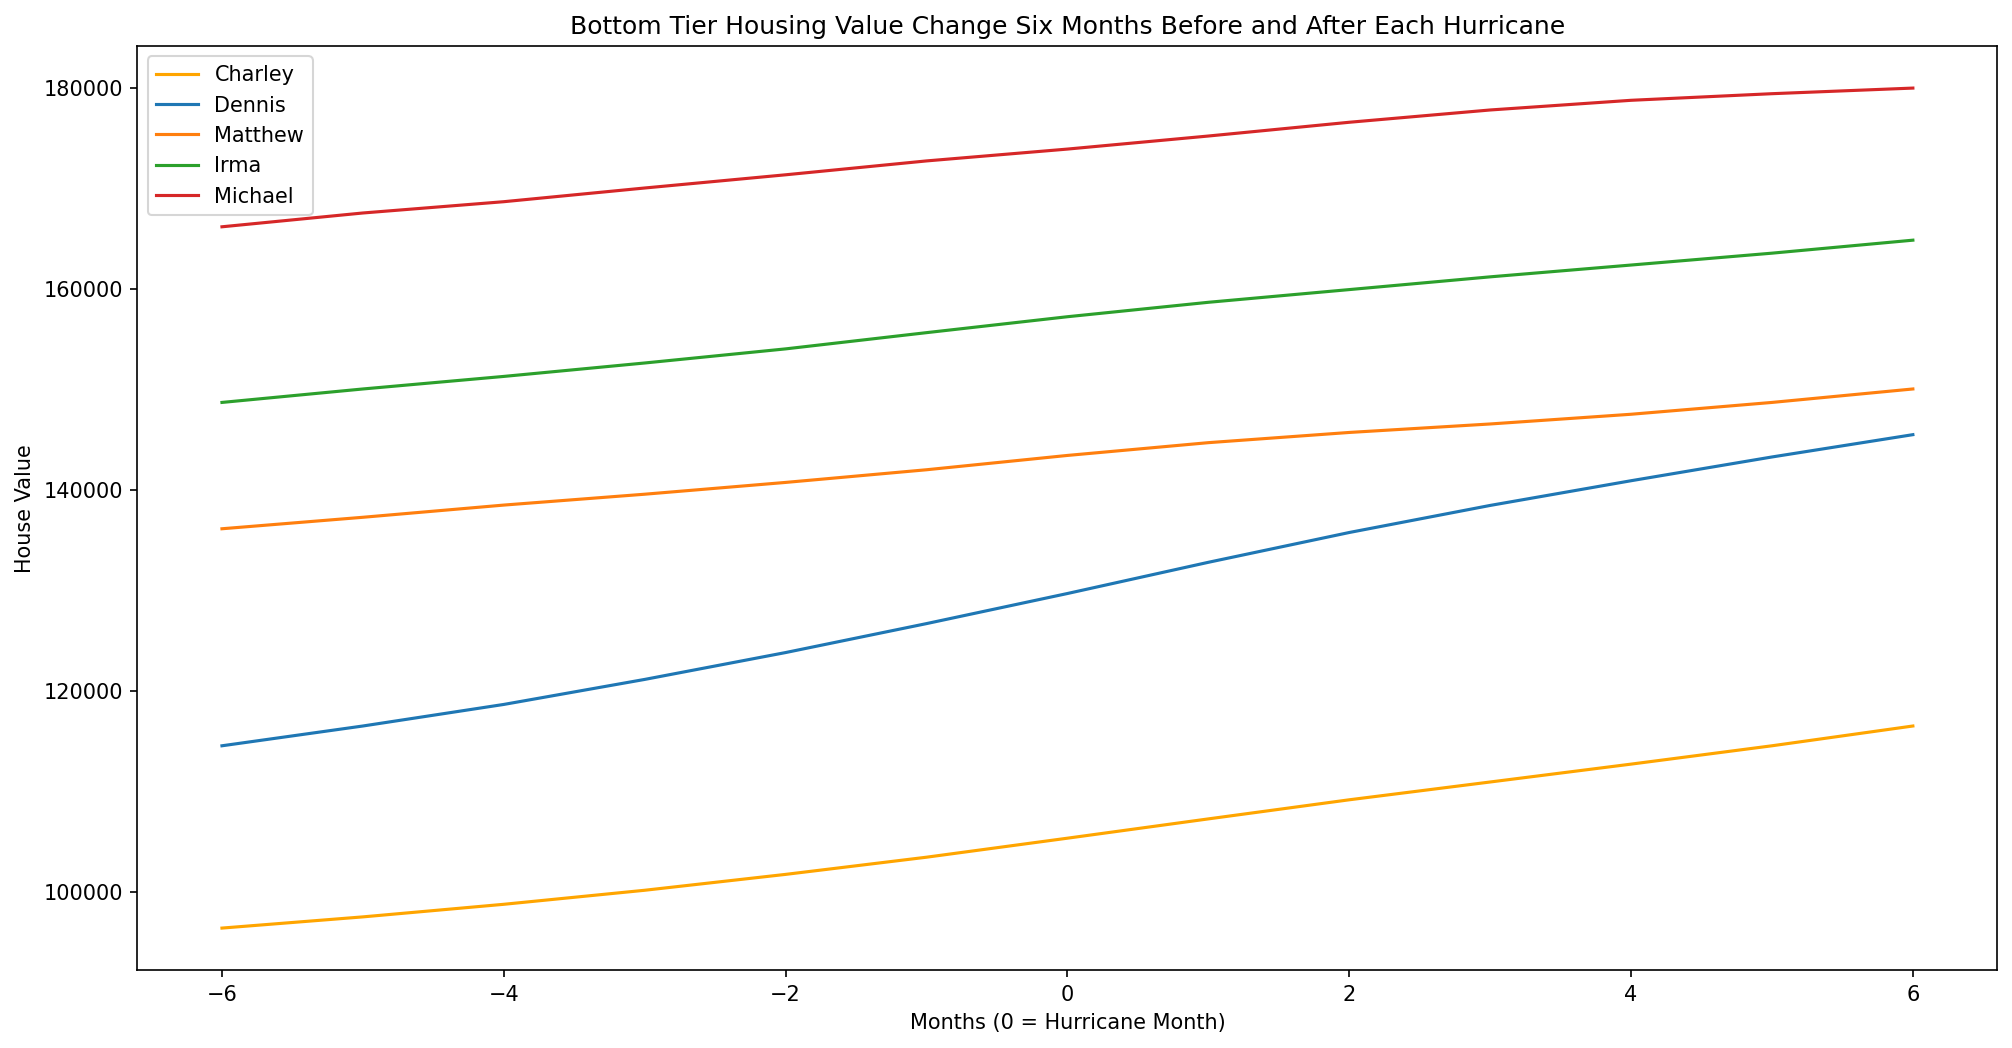

In [29]:
import matplotlib.pyplot as plt
# Visualizing The Value Change of Homes Six Months Before and After Each Hurricane
  
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot values.
# in plot method we set the label and color of the curve.
charley_graph['value'].plot(label='Charley', color='orange')
dennis_graph['value'].plot(label='Dennis')
matthew_graph['value'].plot(label='Matthew')
irma_graph['value'].plot(label='Irma')
michael_graph['value'].plot(label='Michael')
  
# adding title to the plot
plt.title('Bottom Tier Housing Value Change Six Months Before and After Each Hurricane')
  
# adding label to the x-axis
plt.xlabel('Months (0 = Hurricane Month)')

# adding label to the y-axis
plt.ylabel('House Value')
  
# adding legend to the curve
plt.legend();

In [30]:
#perhaps make into bar graph using subplots for each hurricane 

### Graphing Middle Tier Housing 

In [31]:
charley_graph = middle_graph.iloc[49:62]
dennis_graph = middle_graph.iloc[60:73]
matthew_graph = middle_graph.iloc[195:208]
irma_graph = middle_graph.iloc[206:219]
michael_graph = middle_graph.iloc[219:232]

In [32]:
def month(df):
    df['month'] = np.repeat(np.arange(-6, 7), 1)
    df.set_index('month', inplace = True)
    return

In [33]:
#applying the function to our dataframes  
graph_list = [charley_graph, dennis_graph, matthew_graph, irma_graph, michael_graph]
graph_list = [df.pipe(month) for df in graph_list]

In [34]:
charley_graph

,value
month,
-6,191303.062230
-5,193436.158565
-4,195877.892437
-3,198545.994479
-2,201506.671782
-1,204688.834558
0,208289.546555
1,211963.139155
2,215560.046909


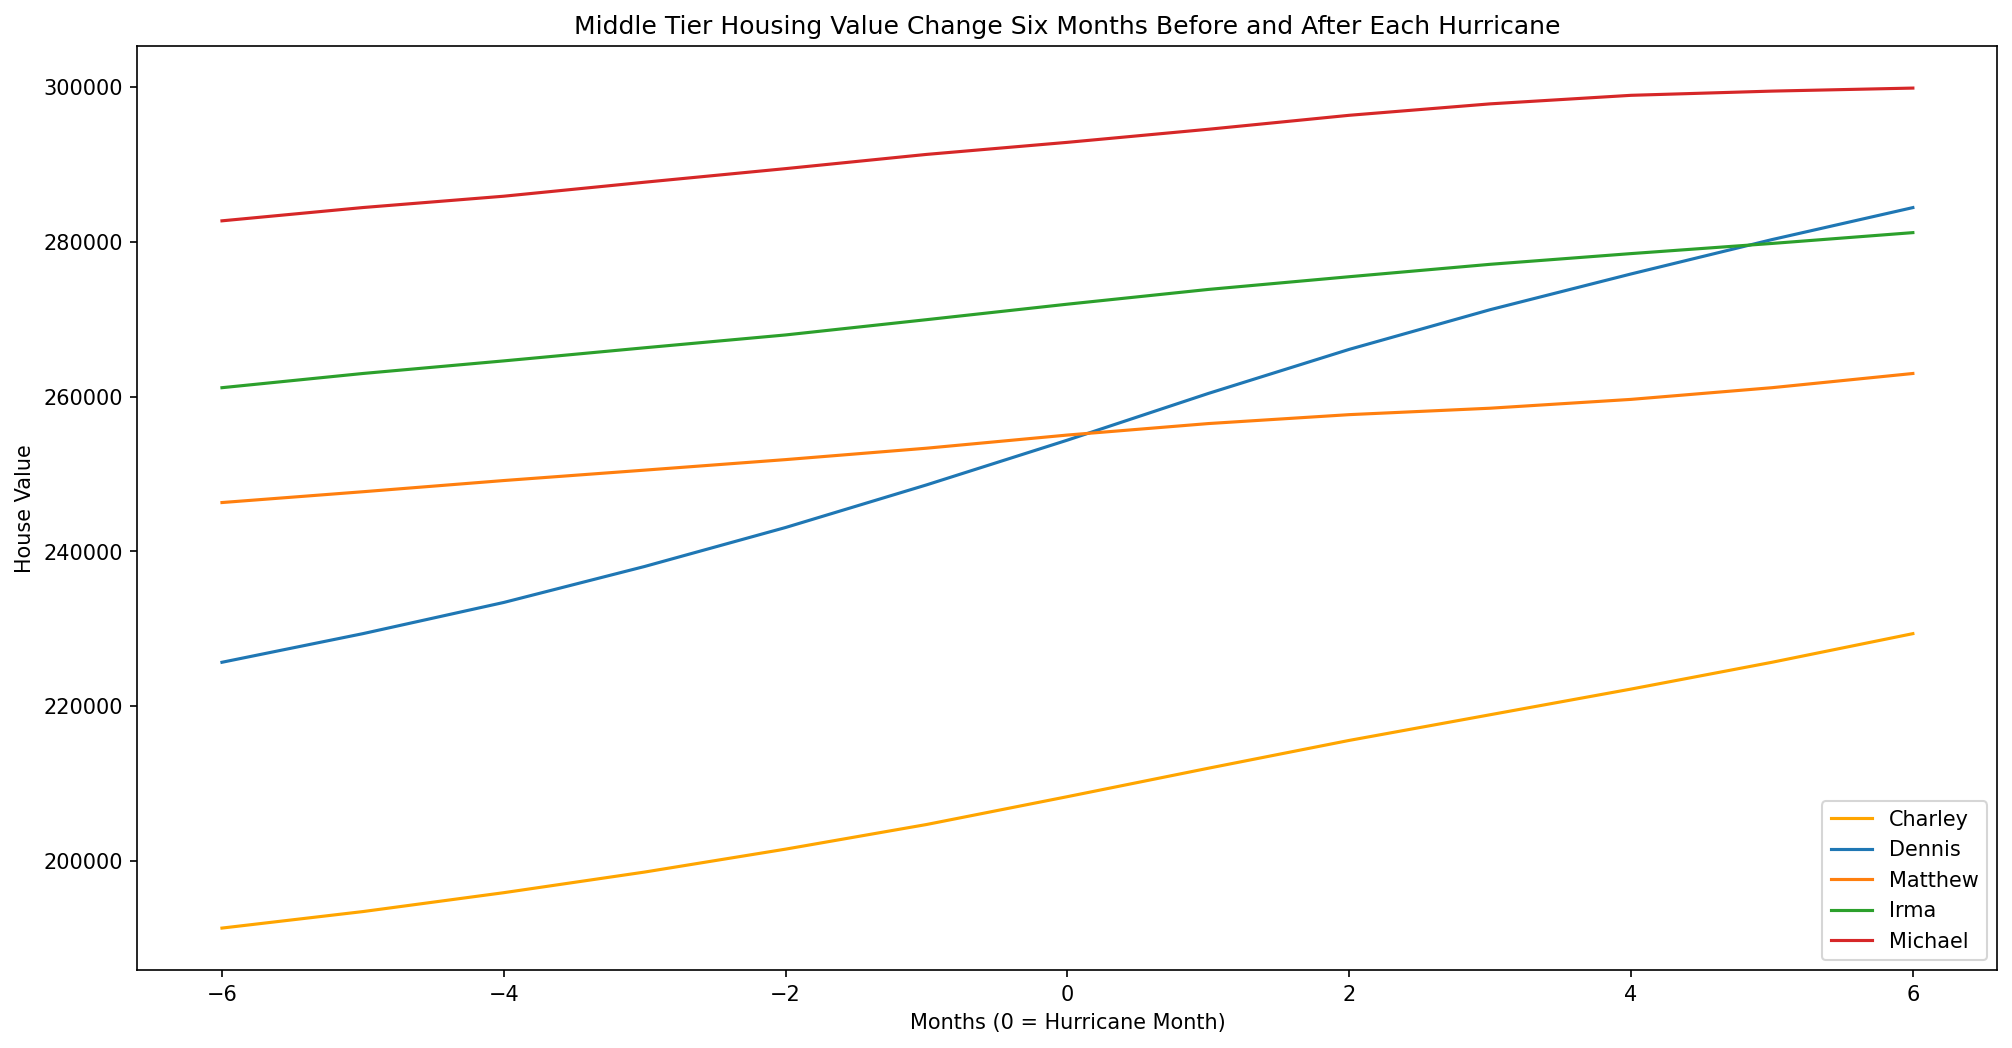

In [35]:
import matplotlib.pyplot as plt
# Visualizing The Value Change of Homes Six Months Before and After Each Hurricane
  
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot values.
# in plot method we set the label and color of the curve.
charley_graph['value'].plot(label='Charley', color='orange')
dennis_graph['value'].plot(label='Dennis')
matthew_graph['value'].plot(label='Matthew')
irma_graph['value'].plot(label='Irma')
michael_graph['value'].plot(label='Michael')
  
# adding title to the plot
plt.title('Middle Tier Housing Value Change Six Months Before and After Each Hurricane')
  
# adding label to the x-axis
plt.xlabel('Months (0 = Hurricane Month)')

# adding label to the y-axis
plt.ylabel('House Value')
  
# adding legend to the curve
plt.legend();

### Graphing Top Tier Housing 

In [36]:
charley_graph = top_graph.iloc[49:62]
dennis_graph = top_graph.iloc[60:73]
matthew_graph = top_graph.iloc[195:208]
irma_graph = top_graph.iloc[206:219]
michael_graph = top_graph.iloc[219:232]

In [37]:
def month(df):
    df['month'] = np.repeat(np.arange(-6, 7), 1)
    df.set_index('month', inplace = True)
    return

In [38]:
#applying the function to our dataframes 
graph_list = [charley_graph, dennis_graph, matthew_graph, irma_graph, michael_graph]
graph_list = [df.pipe(month) for df in graph_list]

NameError: name 'ax' is not defined

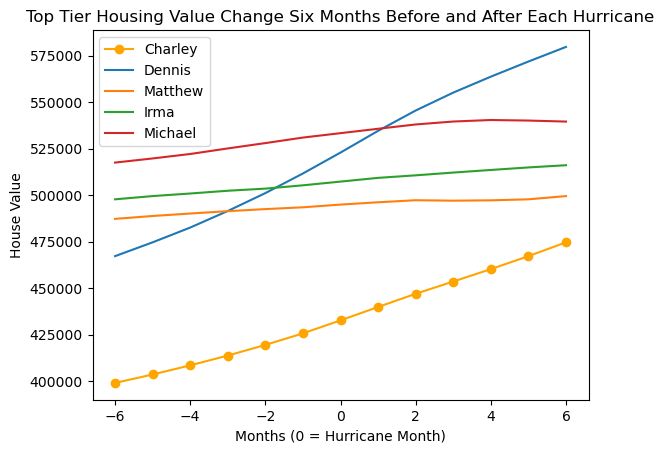

In [39]:
import matplotlib.pyplot as plt
# Visualizing The Value Change of Homes Six Months Before and After Each Hurricane
  
# to set the plot size
fig= plt.figure()
  
# using plot method to plot values.
# in plot method we set the label and color of the curve.
charley_graph['value'].plot(label='Charley', color='orange', marker = 'o')
dennis_graph['value'].plot(label='Dennis')
matthew_graph['value'].plot(label='Matthew')
irma_graph['value'].plot(label='Irma')
michael_graph['value'].plot(label='Michael')
  
# adding title to the plot
plt.title('Top Tier Housing Value Change Six Months Before and After Each Hurricane')
  
# adding label to the x-axis
plt.xlabel('Months (0 = Hurricane Month)')

# adding label to the y-axis
plt.ylabel('House Value')

# adding legend to the curve
plt.legend();

#annotating
ax.annotate((charley_graph['value']), 'xy')

### Writing Functions
Let's write a functions to make scrubbing and engineering our three dataframes simpler. This function will: 
- rename the date columns six months before and after the hurricane
- give us the percent change in home value six months before and after the hurricane 
- create a column telling us if the percent increase was more than 75% 
- and convert the dataframe from wide to long format 

In [ ]:
def renaming(df):
    #Renaming the columns 6 months before and after each hurricane 
    #b = before a = after

    #Charley 2/29/2004 2/28/2005
    df['before_charley'] = df['2/29/2004']
    df['after_charley'] = df['2/28/2005']

    #Dennis 1/31/2005 1/31/2006
    df['before_dennis'] = df['1/31/2005']
    df['after_dennis'] = df['1/31/2006']

    #Matthew 4/30/2016 4/30/2017
    df['before_matthew'] = df['4/30/2016']
    df['after_matthew'] = df['4/30/2017']

    #Irma 3/31/2017 3/31/2018
    df['before_irma'] = df['3/31/2017']
    df['after_irma'] = df['3/31/2018']

    #Michael 4/30/2018 4/30/2019
    df['before_michael'] = df['4/30/2018']
    df['after_michael'] = df['4/30/2019']

    #dropping all unecessary date columns 
    df.drop(df.iloc[:, 2:282], inplace=True, axis=1)
    return df

In [ ]:
#applying the function to our dataframes 
df_list = [bottom, middle, top]
df_list = [df.pipe(renaming) for df in df_list]

In [ ]:
def percent(df):
     #percent = (after - before/before)*100

    #finding percent change for Hurricane Charley
    df['percent_charley'] = (df['after_charley'] - df['before_charley'])/df['before_charley']*100

    #finding percent change for Hurricane Dennis
    df['percent_dennis'] = (df['after_dennis'] - df['before_dennis'])/df['before_dennis']*100

    #finding percent change for Hurricane Matthew
    df['percent_matthew'] = (df['after_matthew'] - df['before_matthew'])/df['before_matthew']*100

    #finding percent change for Hurricane Irma
    df['percent_irma'] = (df['after_irma'] - df['before_irma'])/df['before_irma']*100

    #finding percent change for Hurricane Michael
    df['percent_michael'] = (df['after_michael'] - df['before_michael'])/df['before_michael']*100
    return df

In [ ]:
#applying the function to our dataframes 
df_list = [bottom, middle, top]
df_list = [df.pipe(percent) for df in df_list]

In [ ]:
#checking it out the dataframe
bottom.head()

In [ ]:
def bool(df):
    
    #using cutoff to create boolean value 
    #cutting off at 75%
    #1 = True (increase of more than 75%) 
    #0 = False (no increase of more than 75%)
    
    #creating bool column for charley
    df['increase_charley'] = np.where(df['percent_charley'] >= (df['percent_charley'].quantile(.75)), 1, 0)
    
    #creating bool column for dennis
    df['increase_dennis'] = np.where(df['percent_dennis'] >= (df['percent_dennis'].quantile(.75)), 1, 0)
    
    #creating bool column for matthew
    df['increase_matthew'] = np.where(df['percent_matthew'] >= (df['percent_matthew'].quantile(.75)), 1, 0)
    
    #creating bool column for irma
    df['increase_irma'] = np.where(df['percent_irma'] >= (df['percent_irma'].quantile(.75)), 1, 0)
    
    #creating bool column for michael
    df['increase_michael'] = np.where(df['percent_michael'] >= (df['percent_michael'].quantile(.75)), 1, 0)
    
    #Using pandas wide_to_long (https://pandas.pydata.org/docs/reference/api/pandas.wide_to_long.html)
    #j = hurricane name
    #i = city 
    #stubname = name of variables
    
    df = pd.wide_to_long(df, stubnames = ['before', 'after', 'percent', 'increase'], i= ['City'], j= 'HurricaneName', sep = '_', suffix = r'\w+')
    
    #reseting index
    df.reset_index(inplace=True)

    return df

In [ ]:
#applying the function to our dataframes 
bottom = bool(bottom)
middle = bool(middle)
top = bool(top)

In [ ]:
#checking it out
bottom.head()

In [ ]:
#checking it out
middle.head()

In [ ]:
#checking it out
top.head()

#### Checking for null values 

In [ ]:
bottom.isna().sum()

In [ ]:
bottom.dropna(inplace=True)
bottom.isna().sum()

In [ ]:
middle.isna().sum()

In [ ]:
middle.dropna(inplace=True)
middle.isna().sum()

In [ ]:
top.isna().sum()

In [ ]:
top.dropna(inplace=True)
top.isna().sum()

### Saving the Datasets
Later on we will need to merge these dataset with hurricane data. Let's save it. 

In [ ]:
#saving the h1 dataframe as housing_1year
bottom.to_csv(r'data\bottom_housing.csv', index=False)
#saving the h1 dataframe as housing_1year
middle.to_csv(r'data\middle_housing.csv', index=False)
#saving the h1 dataframe as housing_1year
top.to_csv(r'data\top_housing.csv', index=False)